# NumPy Basics: Array and Vectorized Computation

NumPy stores data in contiguous block of memory. 
NumPy operatons perform complex computations on entire array without the need of Python for Loops.

NumPy is faster than regular Python code because of its C-based algorithms.

## 4.1 NumPy ndarray: A Multidimensional Array Object
N-dimensional array object

All of the elements must be the same type.

In [7]:
import numpy as np

data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

arr2 = np.array(data2)

arr2.ndim
arr2.shape

In [ ]:
np.ones((3, 6, 9))

In [ ]:
# return an array of uninitialized memory, use this only if intend to populate new array with data
np.empty((2,3,2))

# array-valued version of the built-in Python range function
np.arange(15)



array - convert input data (any sequence type) to an ndarray either by inferring a data type or explicitly specifying a data type;copies the input data by default

asarray - convert input to ndarray but do not copy if the input is already an ndarray

arange - like the built-in range but returns and ndarray instead of a list

ones, ones_like - produce an array of all 1s with the fiven shape. 

zeros, zeros_like - 

empty, empty_like - 

full, full_like - Product an array of the given shape and data type with all values set to iondicated fill value

eye, identidy - create a sequare N X N identity matrix (1s on the dignal and 0s else where )

In [ ]:
np.identity(10)

In [ ]:
# Convert or cast an array from one data type to another using astype method

arr = np.array([1, 2, 3, 4, 5])

arr.dtype

float_arr = arr.astype(np.float64)

float_arr.dtype


In [ ]:
# Indexing and slicing
arr = np.arange(10)

arr[5:8]

# Broadcast
arr[5:8] = 12

arr

# Copy the array slice so the modification will not reflect in the original array
arr[5:8].copy()

In [ ]:
arr2d = np.array([[1,2], [3,4], [5,6]])

arr2d[0,1]

In [ ]:
# Indexing with slices
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])

# Select second row but only the first 2 columns
arr2d[1, :2]

# Select 3rd column byt only first 2 rows
arr2d[:2, 2]

# Select rows, first column
arr2d[:, :1]

arr2d[:2, 1:]

In [ ]:
arr3d = np.random.randint(0, 100, size=(3, 3, 3, 4))
arr3d

In [ ]:
arr3d[:2,1:3, :, 1:2]
# [panel, row, column]

In [ ]:
# Boolean indexing
names = np.array(['Bob', 'Joe', 'Bob', 'Will'])

# Create array of boolean with arithmetic operations
names == 'Bob'

In [ ]:
data = np.array([1, 2, 3, 4])

# When pass array of boolean to another np array, the value in truthy index
# will be returned as view

# The boolean array must be of the same length as the array axis
data[names=='Bob'] = 0

# To select everythong but "Bob"
names != 'Bob'
~(names == 'Bob')

# Use ~ operator to invert a Boolean array referenced by a variable

# To select two or more names to combine multiple Boolean conditions
mask = (names == 'Bob') | (names == 'Will')

In [ ]:
data

In [ ]:
# To set all negative value to 0
data[data < 0] = 0

### Fancy indexing
Describe indexing using integer arrays

In [ ]:
arr = np.zeros((8,4))

for i in range(8):
	arr[i] = i

In [ ]:
# To select a subset of the rows in a particular order
# pass a list of ndarray of integers specifying the designer order
arr[[4, 3, 0, 6]]

arr[[-3, -5, -7]]


In [ ]:
arr = np.arange(32).reshape((8, 4))


# Selecting one dimensional array of elements corresponding to each tuple of indices
# (1, 0) (5, 3) (7, 1) (2, 2) will be selected
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

# To select rectangular region formed by subset of matrix's rows and columns
arr[[1, 5, 7, 2]][:,[0, 3, 1, 2]]

# Fancy slicing will return a view or original array
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0 

### Transposing Arrays and Swapping Axes
arr.T

arr.swataxes(0, 1)

In [ ]:
arr = np.arange(4).reshape((2,2))

arr

np.dot(arr, arr)


In [ ]:
arr

In [ ]:
arr_a = np.array([[1,2], [1,2]])

arr_b = np.array([[1,2], [1,2]])

In [ ]:
np.dot(arr_a, arr_b)

## 4.2 Presudorandom Number Generation

Efficiently generating while arrays of sample values. 

In [ ]:
# Get a 4 x 4 array of samples from the standard normal distribution

samples = np.random.standard_normal(size=(4,4))

samples


In [ ]:
from random import normalvariate
N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]

In [ ]:
samples

In [ ]:
%timeit np.random.standard_normal(N)

In [ ]:
# Seed argument is what determines the initial state of the generator.
# and the state changes each time the rng object is used to generate data. 

rng = np.random.default_rng(seed=1)

data = rng.standard_normal((2, 3))

### NumPy random number generator methods

| Method | Description |
|-|-|
| permutation | Return a random permutation of a sequence or return a permuted range | 
| shuffle | Randomly permute a sequence in place |
| uniform | Draw samples from a uniform distribution | 
| integers | Draw random integers from a given low-to-high range |
| standard_normal | Draw samples from a normal distribution with mean 0 and standard deviation 1 | 
| binomial | Draw samples from a binomial distribution | 
| normal | Draw samples from a normal (Gaussian) distribution | 
| beta | Draw samples from a beta distribution | 
| chisquare | Draw samples from a chi-square distribution |
| gamma | Draw samples from a gamma distribution | 
| uniform | Draw samples from a uniform [0, 1) distribution | 

## 4.3 Universal Functions: Fast Element-Wise Array Functions
ufunc - a function that performs element-wise operations on data in ndarrays.

Fast vectorized wrappers from simple functions that take one or more scalar values and product one or more results.

### numpy.maximum 
Captures the element-wise maximum of the elements in x and y

### numpy.modf
Returns multiple array - the functional and integral parts of a floating-point array.
`remainder, whole_part = np.modif(arr)`

ufuncs accept an oprional out argument, allows them to assign their results in to an existing array

`np.add(arr, 1, out=out)`




In [ ]:
arr = np.arange(10)

np.sqrt(arr)

## 4.4 Array-Oriented Programming with Arrays

Replacing explicit loops with array expressions - vectorization 



In [ ]:
points = np.arange(-5, 5, 0.01) 

# np.meshgrid takes tow one dimensional array and product tow two-dimensional matrices
xs, ys = np.meshgrid(points, points)

# Evaluating the function
z = np.sqrt(xs ** 2 + ys ** 2)

In [ ]:
import matplotlib.pyplot as plt


plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

### Expressing Conditional Logics as Array Operations 
numpy.where is a vectorized version of ternary expression `x if condition else y`

In [ ]:
xarr = np.array([1, 2, 3, 4, 5])
yarr = np.array([3, 4, 5, 6, 7])
cond = np.array([True, False, True, True, False])

# If condition is True use the value from xarr, else use yarr
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

# 2nd and 3rd arguments of numpy.where don't need to be arrays, one or both of them can be scalars
result = np.where(cond, xarr, yarr)

# Use np.where to product a new array of values based on another array
rng = np.random.default_rng(seed=123)
arr = rng.standard_normal((4,4))

# Replace all positive valyes in arr with constant 2
np.where(arr > 0, 2, arr)


### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis

`arr.mean(axis=1)` means compute mean across the columns
`arr.mean(axis=0)` means compute mean across the rows

In [ ]:
# Generate some normally distributed random data and compute some aggregate statistics
arr = rng.standard_normal((5,4))
arr.mean()
arr.sum()

### Basic array statstical methods
| Method | Description |
|-|-|
| sum | Sum of all elements in the array or along an axis |
| mean | Arithmetic mean; invalid on zero-length arrays | 
| std, var | Standard deviation and variable | 
| min, max | Minimum and maximum |
| argmin, argmax | Indices of minimum and maximum elements |  
| cumsum | Cumulative sum of elements starting from 0 | 
| cumprod | Cumulative product of elements starting from 1 | 

### Methods for boolean arrays

1 True
0 False

In [ ]:
rng = np.random.default_rng(seed=1)

arr = rng.standard_normal(100)

# Get the sum or a temporary result of arr > 0, calculate all positive values
(arr > 0).sum()

(arr < 0).sum()

bools = np.array([False, True, False])
bools.any() # True
bools.all() # False

### Sorting


In [ ]:
arr = rng.standard_normal(6)

arr.sort()

arr

arr = rng.standard_normal((5, 3))

# sorts values with each column
arr.sort(axis=0)
# sorts values in each row
arr.sort(axis=1)

# numpy.sort return a sorted copy of an array
sorted = np.sort(arr)

### Unique and other set logic
| Method | Description |
|-|-|
| unique(x) | compute the sorted, unique elements in x |
| intersect1d(x, y) | computed the sorted, common elements in x and y |
| union1d(x, y) | computed the sorted, union of elements | 
| in1d(x, y) | computed a boolean array indicating whether each elements of x is contained in y |
| setdiff1d(x, y) | Set difference , elements in X that are not in y | 
| setxor1d(x, y) | set symmetric differences; elements that are in either of the array but not in both | 

In [ ]:
arr.unique() # return an array of unique values

# Test if element in arr also inside 2nd argument, return a boolean array
np.in1d(arr, [1, 2, 3])

### File input and output with arrays

numpy.save and numpy.load for efficiently saving and loading array data on disk

In [ ]:
arr = np.arange(10)

np.save("./practice/some_array", arr)

In [ ]:
np.load('./practice/some_array.npy')

In [ ]:
# Save multiple arrays in an uncompressed archive
np.savez("./practice/array_arhive.npz", a=arr, test=arr)

In [ ]:
arch = np.load("./practice/array_arhive.npz")

In [ ]:
# When loading an .npz file, you get back a dictionary-like object, loads the individual array lazily
arch["test"]

In [ ]:
# Save compressed array
np.savez_compressed("./practice/array_compressed.npz", a=arr)

### 4.6 Lindar Algebra
Matrix multiplication
Decompositions
Determinations
other square matrix math

| Method | Description |
|-|-|
| diag | Return the diagonal (off-diagonal) elements of a square matrix ad a 1D array, or convert 1D array in to a square matrix with zeros on the off-diagonal | 
| dot | matrix multiplication |
| trace | compute the sum of the diagonal elements |
| det | compute the matrix determinant | 
| eig | compute the eigenvalues and eigenvvectors of a square matrix | 
| inv | compute the inverse of a square matrix | 
| pinv | compute the Moore-Penrose pesudoinverse of a matrix | 
| qr | compute the QR decomposition |
| svd | compute the singular value decomposition (SVD) | 
| solve | solve the linear system Ax = b for x where A is a square matrix |
| lstsq | compute the least-squares solution to Ax = b |

In [ ]:
x = np.array([[1,2,3],[4,5,6]])

# the @ symbol will perform matrix operation
x @ np.ones(3)

Numpy linalg has standard set of matrix decompositions 

In [ ]:
X = rng.standard_normal((5, 5))

In [ ]:
X.T

In [ ]:
mat = X.T @ X

In [ ]:
from numpy.linalg import inv

# The inverse of a matrix is a matrix that, when multiplied by the original matrix, results in the identity matrix
# the identity matrix is a square matrix with 1's on the digonal and 0's everywhere else
X @ inv(X)

### 4.7 Example: Random walks


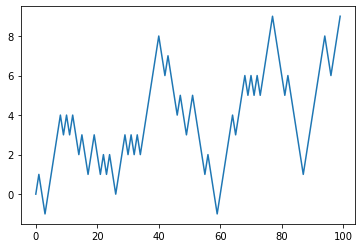

In [5]:
# Pure python way to implement random walk 

import random

position = 0

walk = [position]

nsteps = 1000

for _ in range(nsteps):
	step = 1 if random.randint(0,1) else -1
	position += step
	walk.append(position)

import matplotlib.pyplot as plt
plt.plot(walk[:100])

In [19]:
rng = np.random.default_rng(seed=2345) # fresh random generator

# Generate a nsteps sized 1d random integer array between 0 and 2
draws = rng.integers(0, 2, size = nsteps) 

# print(draws)

# If draw is 0, move one step left (+1), else 1 step right (-1) 
steps = np.where(draws == 0, 1, -1)

# Get the cumulative sum of the steps array
walk = steps.cumsum()

walk.min()
walk.max()

8

In [21]:
# Find the first time walker reached the 10 distance
# Conver walk array to boolean, where when reaches 10 (either left or right) is true else is flase
# argmax() will return the first reached max value (first True value)
# argmax() is not the most efficient way, it always takes a full scan of the array
(np.abs(walk) >= 10).argmax()

173

In [23]:
# Simulating Many Rnadom Walks at Once
# Pass a 2-tuple, use numpy.random to generate a two-dimensional array

nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)


In [31]:
np.amax(walks, axis=1)
np.amin(walks, axis=1).max()

1